In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the crowley data
adata = sc.read_h5ad('dataset/Chen/chen_13_filtered.h5ad')
adata

AnnData object with n_obs × n_vars = 23486 × 2403
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden'
    var: 'GeneID', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

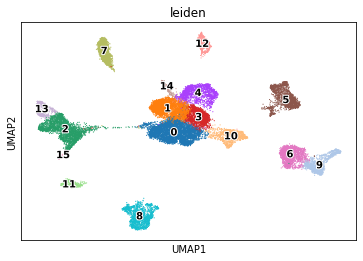

In [3]:
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data', legend_fontoutline = 2)

In [23]:
sc.tl.leiden(adata, restrict_to = ('leiden', ['10']), resolution = 0.5)

running Leiden clustering
    finished: found 19 clusters and added
    'leiden_R', the cluster labels (adata.obs, categorical) (0:00:00)


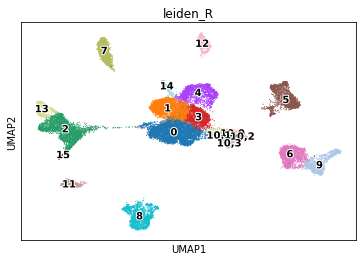

In [24]:
sc.pl.umap(adata, color = 'leiden_R', legend_loc = 'on data', legend_fontoutline = 2)

In [25]:
# perform a wilcoxon rank sum test
sc.tl.rank_genes_groups(adata, groupby = 'leiden_R', method = 'wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:49)


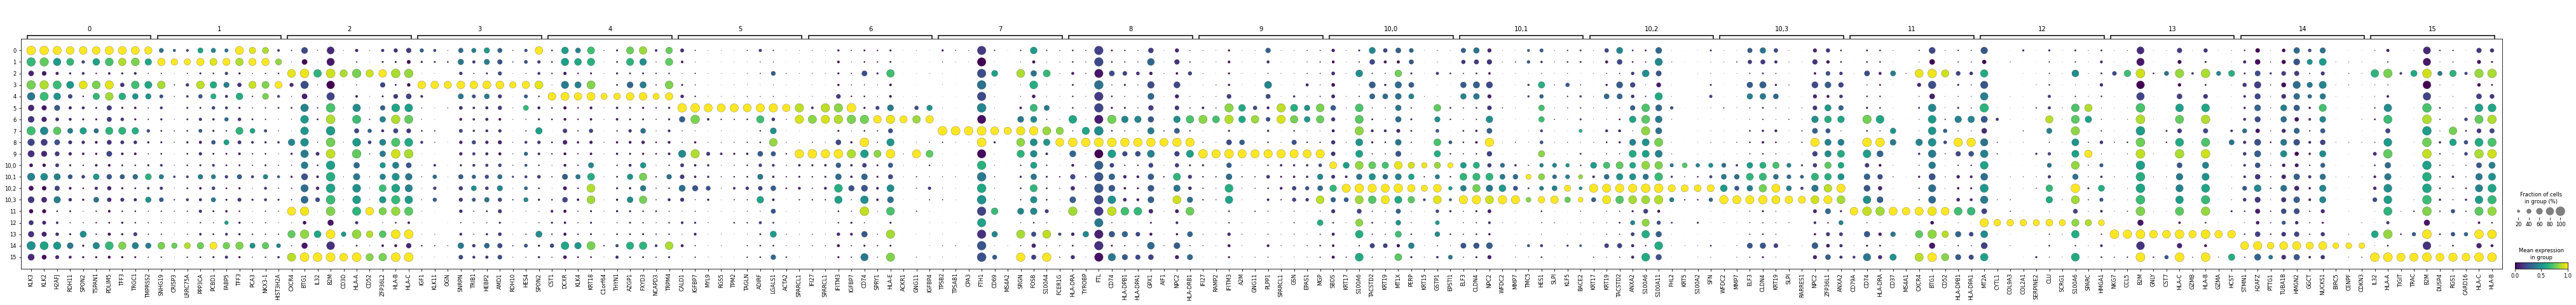

In [27]:
# check top marker genes
sc.pl.rank_genes_groups_dotplot(adata, n_genes = 10, min_logfoldchange = 2, standard_scale = 'var', color_map = 'viridis', dendrogram = False)

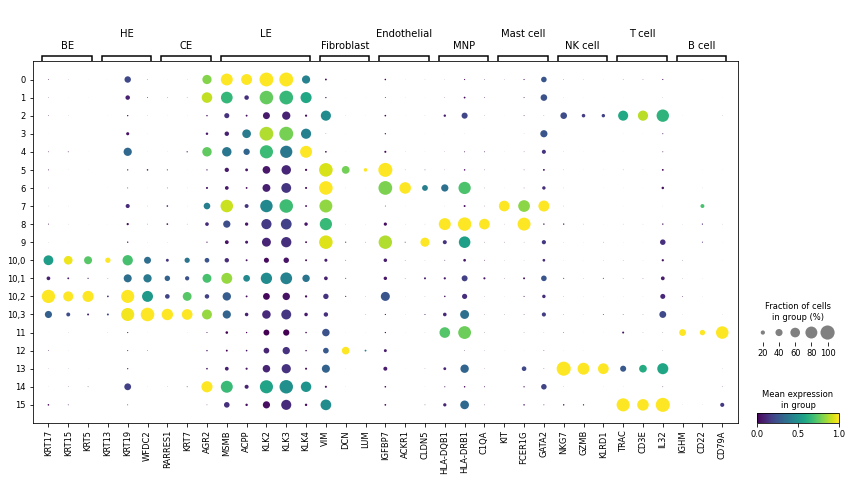

In [29]:
marker_dict = {'BE':['KRT17', 'KRT15', 'KRT5'],
               'HE\n':['KRT13', 'KRT19', 'WFDC2'],
               'CE':['RARRES1', 'KRT7', 'AGR2'],
               'LE\n':['MSMB', 'ACPP', 'KLK2', 'KLK3', 'KLK4'],
               'Fibroblast':['VIM', 'DCN', 'LUM'],
               'Endothelial\n':['IGFBP7', 'ACKR1', 'CLDN5'],
               'MNP':['HLA-DQB1', 'HLA-DRB1', 'C1QA'],
               'Mast cell\n':['KIT', 'FCER1G', 'GATA2'],
               'NK cell':['NKG7', 'GZMB', 'KLRD1'],
               'T cell\n':['TRAC', 'CD3E', 'IL32'],
               'B cell':['IGHM', 'CD22', 'CD79A']}
sc.pl.dotplot(adata, 
                     marker_dict, 
                     standard_scale = 'var', 
                     groupby = 'leiden_R', 
                     var_group_rotation = False, 
                     linewidth = 0,
                     dendrogram = False,
                     color_map = 'viridis')

In [30]:
from tools import returnDEres

In [32]:
returnDEres(adata, column = '5').head(10)

,scores,logfoldchanges,pvals,pvals_adj
CALD1,64.526810,6.022281,0.0,0.0
IGFBP7,61.324497,6.647205,0.0,0.0
MYL9,59.544697,7.559247,0.0,0.0
RGS5,59.244705,9.340861,0.0,0.0
TPM2,59.122227,8.076184,0.0,0.0
TAGLN,57.510204,7.962395,0.0,0.0
ADIRF,55.447430,5.141911,0.0,0.0
LGALS1,55.444984,4.442688,0.0,0.0
ACTA2,53.560585,8.356723,0.0,0.0
SPARCL1,53.506653,5.160151,0.0,0.0


In [34]:
returnDEres(adata, column = '12').head(10)

,scores,logfoldchanges,pvals,pvals_adj
MT2A,28.569664,4.428437,1.600837e-179,2.004569e-175
CYTL1,26.347309,8.202937,5.510004e-153,2.759851e-149
COL9A3,25.825985,9.375434,4.529440e-147,1.890588e-143
COL2A1,24.967323,7.477809,1.384869e-137,4.954667e-134
SERPINE2,23.759727,8.243996,8.716854e-125,2.728811e-121
CLU,23.754665,4.386765,9.832879e-125,2.736163e-121
SCRG1,23.636532,8.756335,1.623799e-123,4.066642e-120
S100A6,20.625772,2.816140,1.611386e-94,2.241976e-91
SPARC,20.381865,4.103858,2.422537e-92,3.193159e-89
HMGA1,20.103056,5.135980,6.938526e-90,7.555150e-87


In [8]:
from tools import cmp

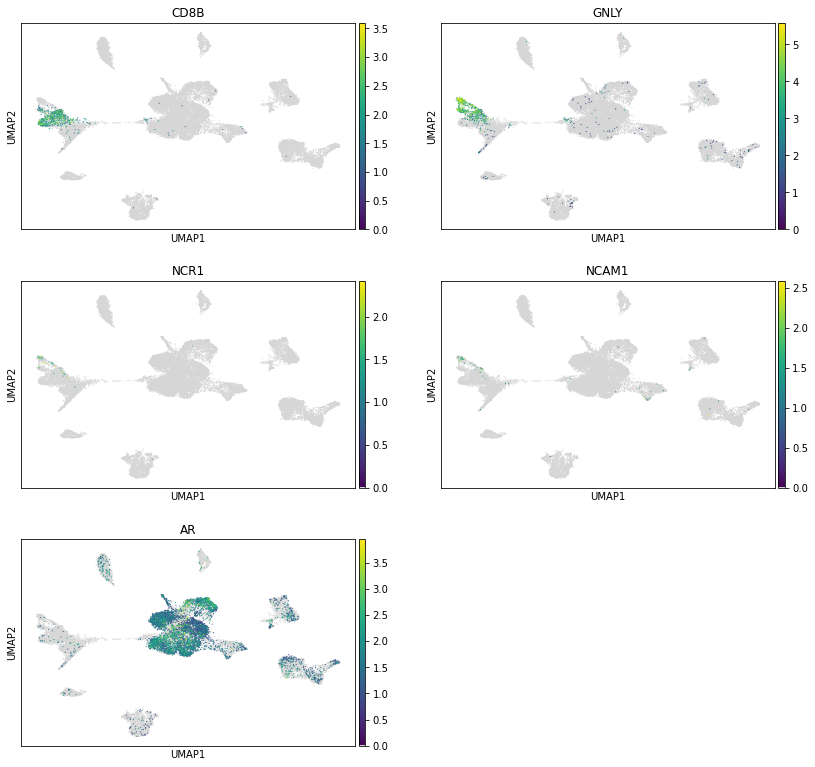

In [12]:
sc.pl.umap(adata, color = ['CD8B', 'GNLY', 'NCR1', 'NCAM1', 'AR'], color_map = cmp(), ncols = 2)

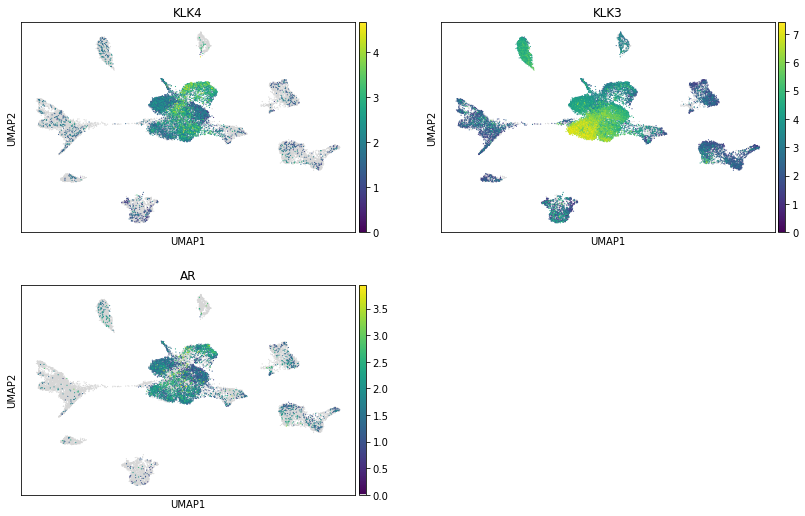

In [13]:
sc.pl.umap(adata, color = ['KLK4', 'KLK3', 'AR'], color_map = cmp(), ncols = 2)

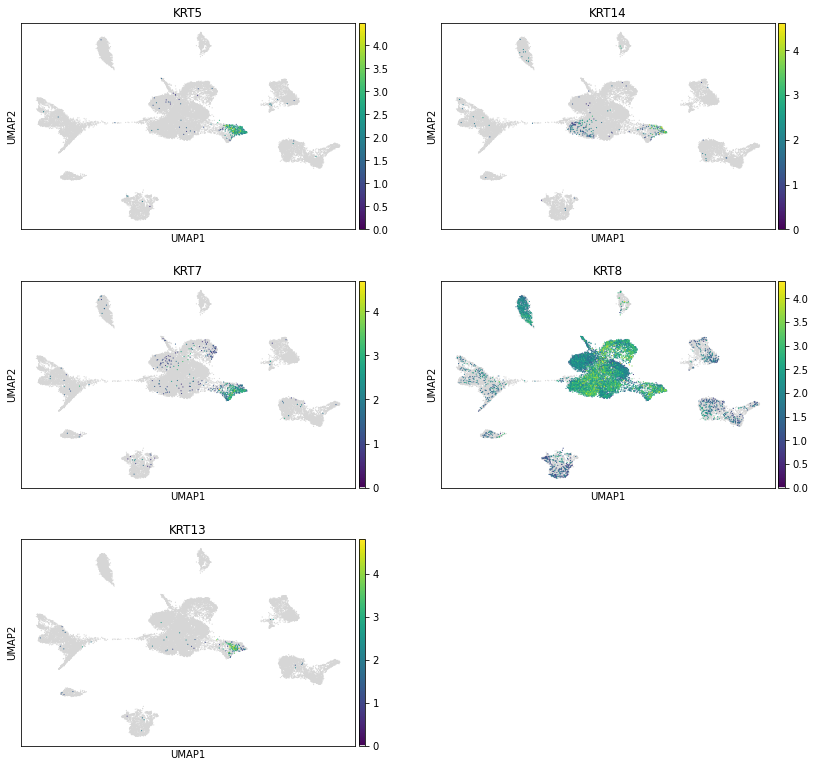

In [11]:
sc.pl.umap(adata, color = ['KRT5', 'KRT14', 'KRT7', 'KRT8', 'KRT13'], color_map = cmp(), ncols = 2)

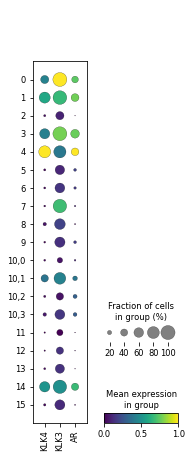

In [35]:
sc.pl.dotplot(adata, ['KLK4', 'KLK3', 'AR'], groupby = 'leiden_R', standard_scale = 'var', color_map = 'viridis')

In [36]:
cols = {'BE': '#1c4481',
        'HE': '#60688d',
        'CE': '#1f77b4',
        'LE-KLK3': '#5b8ba1',
        'LE-KLK3_cycling': '#5b8ba1',
        # 'LE-KLK4': '#b4d5de',
        'Fibroblast': '#59a14f',
        'Myofibroblast': '#59a14f',
        'Endothelial': '#8cd17d',
        'MNP': '#c7233b',
        'Mast cell': '#d37295',
        'NK cell': '#ff9d9a',
        'T cell': '#f28e2b',
        'B cell': '#fcbf10',
        # 'Sperm': '#727272',
        # 'Erythrocyte': '#727272',
       }

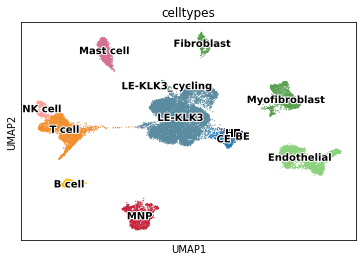

In [37]:
celltypes = {
'0':'LE-KLK3',
'1':'LE-KLK3',
'2':'T cell',
'3':'LE-KLK3',
'4':'LE-KLK3',
'5':'Myofibroblast',
'6':'Endothelial',
'7':'Mast cell',
'8':'MNP',
'9':'Endothelial',
'10,0':'HE',
'10,1':'CE',
'10,2':'BE',
'10,3':'CE',
'11':'B cell',
'12':'Fibroblast',
'13':'NK cell',
'14':'LE-KLK3_cycling',
'15':'T cell',
}
adata.obs['celltypes'] = [celltypes[l] for l in adata.obs['leiden_R']]
adata.obs['celltypes'] = adata.obs['celltypes'].astype('category')
adata.obs['celltypes'] = adata.obs['celltypes'].cat.reorder_categories([k for k in cols.keys() if k in list(adata.obs['celltypes'])])
sc.pl.umap(adata, color = 'celltypes', palette = cols, legend_loc = 'on data', legend_fontoutline = 2)

In [38]:
adata

AnnData object with n_obs × n_vars = 23486 × 2403
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden', 'leiden_R', 'celltypes'
    var: 'GeneID', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap', 'rank_genes_groups', 'dendrogram_leiden', 'dendrogram_leiden_R', 'leiden_R_colors', 'celltypes_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [39]:
adata.write_h5ad('dataset/Chen/chen_13_filtered.h5ad', compression = 'gzip')

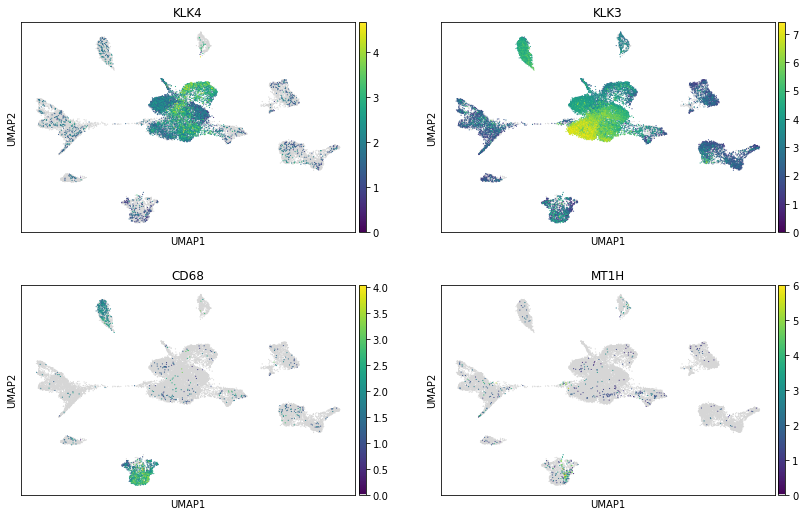

In [40]:
sc.pl.umap(adata, color = ['KLK4', 'KLK3', 'CD68', 'MT1H'], color_map = cmp(), ncols = 2)